In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as st

# 6.1 Omitted Variable Bias

In [2]:
# load the `CASchools` dataset
CASchools=pd.read_csv('CASchools.csv')

# add student-teacher ratio
CASchools['STR'] = CASchools['students']/CASchools['teachers']

# add average test-score
CASchools['score'] = (CASchools['read'] + CASchools['math'])/2

# compute correlations
print(np.corrcoef(CASchools['STR'],CASchools['score']))
print(np.corrcoef(CASchools['STR'],CASchools['english']))

[[ 1.         -0.22636275]
 [-0.22636275  1.        ]]
[[1.         0.18764237]
 [0.18764237 1.        ]]


In [3]:
# estimate both regression models
mod=smf.ols('score~STR', data=CASchools).fit()
mult_mod=smf.ols('score~STR+english', data=CASchools).fit()

# print the results to the console
print(mod.params)
print(mult_mod.params)

Intercept    698.932949
STR           -2.279808
dtype: float64
Intercept    686.032245
STR           -1.101296
english       -0.649777
dtype: float64


# 6.2 The Multiple Regression Model

In [4]:
mult_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     155.0
Date:                Tue, 17 Jan 2023   Prob (F-statistic):           4.62e-51
Time:                        17:38:30   Log-Likelihood:                -1716.6
No. Observations:                 420   AIC:                             3439.
Df Residuals:                     417   BIC:                             3451.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    686.0322      7.411     92.566      0.000     671.464     700.600
STR           -1.1013      0.380     -2.896      0.004      -1.849      -0.354
english       -0.6498      0.039    -16.516      0.000      -0.727      -0.572
==============================================================================
Omnibus:                        0.631   Durbin-Watson:                   0.686
Prob(Omnibus):                  0.729   Jarque-Bera (JB):                0.550
Skew:                           0.088   Prob(JB):                        0.760
Kurtosis:                       3.024   Cond. No.                         301.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 6.3 Measures of Fit in Multiple Regression

In [5]:
mult_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     155.0
Date:                Tue, 17 Jan 2023   Prob (F-statistic):           4.62e-51
Time:                        17:38:30   Log-Likelihood:                -1716.6
No. Observations:                 420   AIC:                             3439.
Df Residuals:                     417   BIC:                             3451.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    686.0322      7.411     92.566      0.000     671.464     700.600
STR           -1.1013      0.380     -2.896      0.004      -1.849      -0.354
english       -0.6498      0.039    -16.516      0.000      -0.727      -0.572
==============================================================================
Omnibus:                        0.631   Durbin-Watson:                   0.686
Prob(Omnibus):                  0.729   Jarque-Bera (JB):                0.550
Skew:                           0.088   Prob(JB):                        0.760
Kurtosis:                       3.024   Cond. No.                         301.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# define the components

n=len(CASchools)  # number of observations (rows)
k=2               # number of regressors

y_mean=CASchools['score'].mean()


SSR=sum((mult_mod.resid)**2)                 # sum of squared residuals
TSS =sum((CASchools['score'] - y_mean )**2)  # total sum of squares
ESS=sum((mult_mod.fittedvalues- y_mean)**2)  # explained sum of squares

# compute the measures
SER = np.sqrt(1/(n-k-1) * SSR)                 # standard error of the regression
Rsq = 1 - (SSR / TSS)                          # R^2
adj_Rsq = 1 - (n-1)/(n-k-1) * SSR/TSS          # adj. R^2

# print the measures to the console
print("SER=",SER)
print("R2=", Rsq)
print("Adj.R2=", adj_Rsq)

SER= 14.464483125843133
R2= 0.4264314554663665
Adj.R2= 0.423680527195222


# 6.4 OLS Assumptions in Multiple Regression

## Multicollinearity

### Examples of Perfect Multicollinearity

In [7]:
# define the fraction of English learners 
CASchools['FracEL'] = CASchools['english'] / 100

# estimate the model
mult_mod=smf.ols('score~STR+english+FracEL', data=CASchools).fit()

# obtain a summary of the model
mult_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     155.0
Date:                Tue, 17 Jan 2023   Prob (F-statistic):           4.62e-51
Time:                        17:38:30   Log-Likelihood:                -1716.6
No. Observations:                 420   AIC:                             3439.
Df Residuals:                     417   BIC:                             3451.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    686.0322      7.411     92.566      0.000     671.464     700.600
STR           -1.1013      0.380     -2.896      0.004      -1.849      -0.354
english       -0.6497      0.039    -16.516      0.000      -0.727      -0.572
FracEL        -0.0065      0.000    -16.516      0.000      -0.007      -0.006
==============================================================================
Omnibus:                        0.631   Durbin-Watson:                   0.686
Prob(Omnibus):                  0.729   Jarque-Bera (JB):                0.550
Skew:                           0.088   Prob(JB):                        0.760
Kurtosis:                       3.024   Cond. No.                     2.36e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.15e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [8]:
# if STR smaller 12, NS = 0, else NS = 1
CASchools['NS']=1
CASchools.loc[CASchools['STR']<12,'NS']=0

# estimate the model
mult_mod = smf.ols('score ~ computer + english + NS', data = CASchools).fit()

# obtain a model summary
mult_mod.summary()

C:\Users\renan\.conda\envs\base2\lib\site-packages\statsmodels\regression\linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     156.7
Date:                Tue, 17 Jan 2023   Prob (F-statistic):           1.76e-51
Time:                        17:38:34   Log-Likelihood:                -1715.6
No. Observations:                 420   AIC:                             3437.
Df Residuals:                     417   BIC:                             3449.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    331.8524      0.492    674.319      0.000     330.885     332.820
computer       0.0054      0.002      3.218      0.001       0.002       0.009
english       -0.7089      0.040    -17.591      0.000      -0.788      -0.630
NS           331.8524      0.492    674.319      0.000     330.885     332.820
==============================================================================
Omnibus:                        4.907   Durbin-Watson:                   0.693
Prob(Omnibus):                  0.086   Jarque-Bera (JB):                4.665
Skew:                           0.241   Prob(JB):                       0.0971
Kurtosis:                       3.185   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [9]:
CASchools['NS'].describe()

count    420.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: NS, dtype: float64

In [10]:
# set seed for reproducibility
np.random.seed(1)
# generate artificial data on location
CASchools['direction']=np.random.choice(["West", "North", "South", "East"], 420)
# estimate the model
mult_mod = smf.ols('score ~ STR + english + direction', data = CASchools).fit()
# obtain a model summary
mult_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     64.21
Date:                Tue, 17 Jan 2023   Prob (F-statistic):           1.62e-49
Time:                        17:38:38   Log-Likelihood:                -1712.7
No. Observations:                 420   AIC:                             3437.
Df Residuals:                     414   BIC:                             3462.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            684.9060      7.449     91.951      0.000     670.264     699.548
direction[T.North]    -2.6603      2.004     -1.328      0.185      -6.599       1.278
direction[T.South]     2.2871      2.035      1.124      0.262      -1.714       6.288
direction[T.West]      1.8646      1.950      0.956      0.340      -1.969       5.698
STR                   -1.0571      0.379     -2.791      0.005      -1.802      -0.313
english               -0.6578      0.039    -16.736      0.000      -0.735      -0.581
==============================================================================
Omnibus:                        1.388   Durbin-Watson:                   0.725
Prob(Omnibus):                  0.500   Jarque-Bera (JB):                1.185
Skew:                           0.117   Prob(JB):                        0.553
Kurtosis:                       3.114   Cond. No.                         304.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# Percentage of english speakers 
CASchools['PctES'] = 100 - CASchools['english']
# estimate the model
mult_mod =smf.ols('score ~ STR + english + PctES', data = CASchools).fit()
# obtain a model summary
mult_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     155.0
Date:                Tue, 17 Jan 2023   Prob (F-statistic):           4.62e-51
Time:                        17:38:40   Log-Likelihood:                -1716.6
No. Observations:                 420   AIC:                             3439.
Df Residuals:                     417   BIC:                             3451.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1307      0.002     83.087      0.000       0.128       0.134
STR           -1.1013      0.380     -2.896      0.004      -1.849      -0.354
english        6.2092      0.087     70.980      0.000       6.037       6.381
PctES          6.8590      0.074     92.567      0.000       6.713       7.005
==============================================================================
Omnibus:                        0.631   Durbin-Watson:                   0.686
Prob(Omnibus):                  0.729   Jarque-Bera (JB):                0.550
Skew:                           0.088   Prob(JB):                        0.760
Kurtosis:                       3.024   Cond. No.                     6.11e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.94e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Imperfect Multicollinearity

## Simulation Study: Imperfect Multicollinearity

In [12]:
# set number of observations
n = 50

# set seed
np.random.seed(1)
# initialize vectors of coefficients
coefs1=[]
coefs2=[]
coefs3=[]
coefs4=[]

# loop sampling and estimation
for i in range(10000):
    # for cov(X_1,X_2) = 0.25
    X=np.random.multivariate_normal(mean=(50,100), cov=[[10,2.5],[2.5,10]] , size=n)
    u=np.random.normal(scale=5, size=n)
    Y = 5 + 2.5 * X[:, 0] + 3 * X[:,1] + u
    data=pd.DataFrame({'Y':Y, 'X1':X[:, 0], 'X2':X[:,1]})
    model=smf.ols('Y~X1+X2', data=data).fit()
    coefs1.append(model.params[1])
    coefs2.append(model.params[2])
    
    # for cov(X_1,X_2) = 0.85
    X=np.random.multivariate_normal(mean=(50,100), cov=[[10,8.5],[8.5,10]] , size=n)
    u=np.random.normal(scale=5, size=n)
    Y = 5 + 2.5 * X[:, 0] + 3 * X[:,1] + u
    data=pd.DataFrame({'Y':Y, 'X1':X[:, 0], 'X2':X[:,1]})
    model=smf.ols('Y~X1+X2', data=data).fit()
    coefs3.append(model.params[1])
    coefs4.append(model.params[2])

    # obtain variance estimates
print("hat_beta_1:",np.cov(coefs1,coefs2)[0][0],"hat_beta_2:",np.cov(coefs1,coefs2)[1][1])
print("hat_beta_1:",np.cov(coefs3,coefs4)[0][0],"hat_beta_2:",np.cov(coefs3,coefs4)[1][1])

hat_beta_1: 0.12344624871926523 hat_beta_2: 0.028710248338659296
hat_beta_1: 0.2732146313987266 hat_beta_2: 0.3289690838542895


# 6.5 The Distribution of the OLS Estimators in Multiple Regression

In [70]:
# set number of observations
n = 50

# set seed
np.random.seed(1)
# initialize vectors of coefficients
coefs1=[]
coefs2=[]

# loop sampling and estimation
for i in range(10000):
    X=np.random.multivariate_normal(mean=(50,100), cov=[[10,2.5],[2.5,10]] , size=n)
    u=np.random.normal(scale=5, size=n)
    Y = 5 + 2.5 * X[:, 0] + 3 * X[:,1] + u
    data=pd.DataFrame({'Y':Y, 'X1':X[:, 0], 'X2':X[:,1]})
    model=smf.ols('Y~X1+X2', data=data).fit()
    coefs1.append(model.params[1])
    coefs2.append(model.params[2])
    
# compute density estimate
values = np.vstack([coefs1, coefs2])
kernel = st.gaussian_kde(values)
# plot density estimate



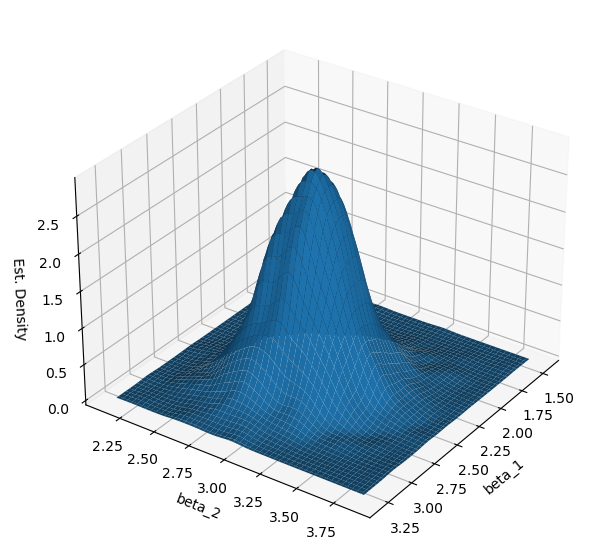

In [90]:
# Name x and y
x = coefs1
y = coefs2

#Create meshgrid
xx, yy = np.mgrid[min(x):max(x):100j, min(y):max(y):100j]

#fit a gaussian kernel
positions = np.vstack([xx.ravel(), yy.ravel()]) # x and y ordered
values = np.vstack([x, y]) #stack x and y in a 2d vector
kernel = st.gaussian_kde(values) #get kernel density estimate
f = np.reshape(kernel(positions).T, xx.shape) #get kernel value for the positions and reshape

#Plot the density estimate
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, f)
ax.set_xlabel('beta_1')
ax.set_ylabel('beta_2')
ax.set_zlabel('Est. Density')
ax.view_init(30, 35)